# SENTIMENT ANALYSIS USING SIKIT LEARN TFIDFVECTORIZER (BAG OF WORDS)

#### Data: Amazon *Book Reviews*
#### Data Source : *kaggle* 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

##### Creating an helper class for data preprocessing

In [23]:
class Book_Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiments()
        
    
 # Assigning sentiments based on rating   
    def get_sentiments(self):
        if self.score <=3:
            return "bad"
        else:
            return "good"





In [24]:
## reading our data and saving it into a python list 
import json
book_reviews = []
with open('Amazon books big.json') as f:
    for line in f:
        Books_reviews = json.loads(line)
        book_reviews.append(Book_Review(Books_reviews['reviewText'],Books_reviews['overall']))

len(book_reviews)

10000

#### Converting our data into a pandas dataframe

In [25]:


text = [x.text for x in book_reviews]
sentiment = [x.sentiment for x in book_reviews]

data = pd.DataFrame()

data['text']=text
data['sentiment']=sentiment

data

,text,sentiment
0,"I bought both boxed sets, books 1-5. Really a...",good
1,I enjoyed this short book. But it was way way ...,bad
2,I love Nicholas Sparks. I&#8217;ve read everyt...,good
3,I really enjoyed this adventure and look forwa...,good
4,It was a decent read.. typical story line. Not...,bad
...,...,...
9995,The whole series was great! Melody is a fanta...,good
9996,I didn't thing that much of this book. I am a...,bad
9997,It is an emotional TRIP to the past with Trip ...,good
9998,This definitely got under my veins whereby I h...,good


In [26]:
data['sentiment'].value_counts()

good    8378
bad     1622
Name: sentiment, dtype: int64

Text(0, 0.5, 'Count')

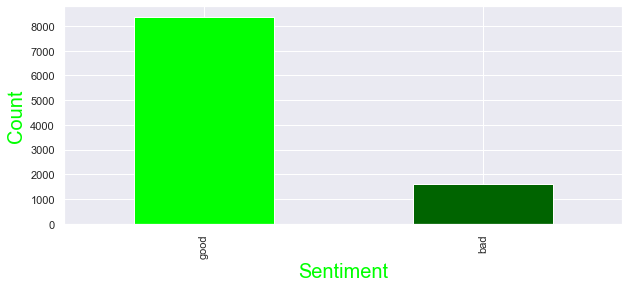

In [27]:
import seaborn as sns
sns.set()
plt.figure(figsize=(10,4))
data['sentiment'].value_counts().plot(kind='bar', color=['lime',  'darkgreen'])
plt.xlabel('Sentiment', fontsize=20, color='lime')
plt.ylabel('Count', fontsize=20, color='lime')

**our dataset is not balance and should not be used in building a machine learning model because of bayes**

## Balancing Our Data set

In [28]:
good_review = data.loc[data['sentiment']=='good']
bad_review = data.loc[data['sentiment']=='bad']

In [29]:
good_review

,text,sentiment
0,"I bought both boxed sets, books 1-5. Really a...",good
2,I love Nicholas Sparks. I&#8217;ve read everyt...,good
3,I really enjoyed this adventure and look forwa...,good
5,I hoped for Mia to have some peace in this boo...,good
7,"This is the First book in the Trilogy, and I'm...",good
...,...,...
9992,"Intense and not for the faint of heart, Craig ...",good
9995,The whole series was great! Melody is a fanta...,good
9997,It is an emotional TRIP to the past with Trip ...,good
9998,This definitely got under my veins whereby I h...,good


In [31]:
bad_review

,text,sentiment
1,I enjoyed this short book. But it was way way ...,bad
4,It was a decent read.. typical story line. Not...,bad
6,The book has the fevered intensity of Oliver S...,bad
27,I would buy anything with the name NORA EFRON ...,bad
30,"My Reflections:The well developed characters, ...",bad
...,...,...
9982,*I received a free copy of this book to read a...,bad
9984,Having this book toted as a YA series on Amazo...,bad
9993,I've tried to start this graphic novel a coupl...,bad
9994,Not so Much this. There is a less genuine res...,bad


In [32]:
print(len(good_review), len(bad_review))
print(good_review.shape, bad_review.shape)

8378 1622
(8378, 2) (1622, 2)


In [33]:
good_df = good_review.sample(n=len(bad_review), random_state=42)
bad_df =bad_review

In [34]:
print(len(good_df), len(bad_df))
print(good_df.shape, bad_df.shape)

1622 1622
(1622, 2) (1622, 2)


In [35]:
df = good_df.append(bad_df).reset_index(drop=True)

C:\Users\Emack\AppData\Local\Temp\ipykernel_10316\953249244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = good_df.append(bad_df).reset_index(drop=True)


In [36]:
df

,text,sentiment
0,This series just keeps surprising me. I adored...,good
1,"Not a bad book, but.... it needs more info abo...",good
2,This book is just so amazing it is hard to wri...,good
3,This is my absolute favorite book by Leslie Fe...,good
4,Bright colors and funny baby faces - my baby l...,good
...,...,...
3239,*I received a free copy of this book to read a...,bad
3240,Having this book toted as a YA series on Amazo...,bad
3241,I've tried to start this graphic novel a coupl...,bad
3242,Not so Much this. There is a less genuine res...,bad


Text(0, 0.5, 'Count')

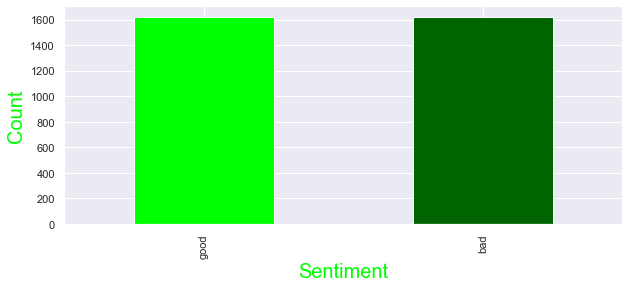

In [37]:
sns.set()
plt.figure(figsize=(10,4))
df['sentiment'].value_counts().plot(kind='bar', color=['lime',  'darkgreen'])
plt.xlabel('Sentiment', fontsize=20, color='lime')
plt.ylabel('Count', fontsize=20, color='lime')

**Our Dataset is now balanced i can be used for building a model**

In [38]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [39]:
print(f" This is the total length of X {len(X)}\n This is the total length of train X and y {len(X_train)}, {len(y_train)}")

 This is the total length of X 3244
 This is the total length of train X and y 2595, 2595


In [40]:
print(f" This is the total length of y {len(y)}\n This is the total length of test X and y {len(X_test)}, {len(y_test)}")

 This is the total length of y 3244
 This is the total length of test X and y 649, 649


#### Bags of words using Sklearn

In [42]:
vectorizer =TfidfVectorizer()
train_x_vector = vectorizer.fit_transform(X_train)
test_x_vector = vectorizer.transform(X_test)

#### Trying various Classification models

In [43]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

###### SVM

In [44]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(train_x_vector, y_train)
svm_clf.score(test_x_vector, y_test)

0.7796610169491526

###### Decision Tree Classifier

In [45]:
dt = DecisionTreeClassifier()
dt.fit(train_x_vector, y_train)
dt.score(test_x_vector, y_test)

0.6471494607087828

###### naive bayes classifier

In [46]:
gnb = GaussianNB()
gnb.fit(train_x_vector.toarray() , y_train)
gnb.score(test_x_vector.toarray(), y_test)

0.5654853620955316

###### Logistics Regression

In [47]:
lr =LogisticRegression()
lr.fit(train_x_vector, y_train)
lr.score(test_x_vector, y_test)

0.7919876733436055

###### K Nearest Neigbours

In [48]:
kn =KNeighborsClassifier()
kn.fit(train_x_vector, y_train)
kn.score(test_x_vector, y_test)

0.687211093990755

###### Random Forest

In [49]:
rf =RandomForestClassifier()
rf.fit(train_x_vector, y_train)
rf.score(test_x_vector, y_test)

0.7673343605546995

##### Visualizing our model scores

In [50]:
model_scores={"svm":svm_clf.score(test_x_vector, y_test), 'naive bayes':gnb.score(test_x_vector.toarray(), y_test),
             'Logistic regression':lr.score(test_x_vector, y_test),"k nearest neighbour":kn.score(test_x_vector, y_test),
             "Random Forest":kn.score(test_x_vector, y_test)}

In [51]:
model_scores.keys()

dict_keys(['svm', 'naive bayes', 'Logistic regression', 'k nearest neighbour', 'Random Forest'])

Text(0.5, 1.0, 'Models and their score performance')

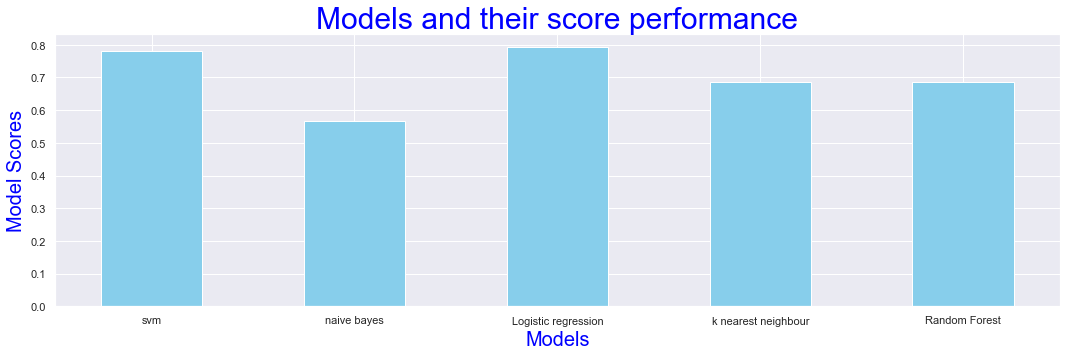

In [52]:
plt.figure(figsize=(18,5))
plt.bar(model_scores.keys(), model_scores.values(), width=0.5, color='skyblue')
plt.ylabel('Model Scores', fontsize=20, color="blue")
plt.xlabel('Models', fontsize=20, color="blue")
plt.title('Models and their score performance', fontsize=30, color="blue")

### MODEL EVALUATION



In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
sns.set(font_scale =1.5)

def plot_conf_mat(y_test, y_preds, name):
    """
    Plots a nice looking confusion matrix using seaborns's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(6,6))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=True)
    
    plt.xlabel("True label")
    plt.ylabel("predicted label")
    plt.title(name)
    plt.show()

----------------------------------------------for SVM--------------------------------------
              precision    recall  f1-score   support

         bad       0.77      0.80      0.79       328
        good       0.79      0.76      0.77       321

    accuracy                           0.78       649
   macro avg       0.78      0.78      0.78       649
weighted avg       0.78      0.78      0.78       649

[[262  66]
 [ 77 244]]


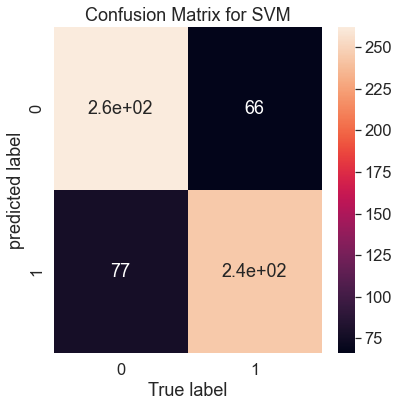

In [55]:
print('----------------------------------------------for SVM--------------------------------------')
print(classification_report(y_test, svm_clf.predict(test_x_vector)))
print(confusion_matrix(y_test,svm_clf.predict(test_x_vector)))
plot_conf_mat(y_test,svm_clf.predict(test_x_vector), 'Confusion Matrix for SVM')

----------------------------------------------for Decision Tree--------------------------------------
              precision    recall  f1-score   support

         bad       0.65      0.66      0.66       328
        good       0.65      0.63      0.64       321

    accuracy                           0.65       649
   macro avg       0.65      0.65      0.65       649
weighted avg       0.65      0.65      0.65       649

[[218 110]
 [119 202]]


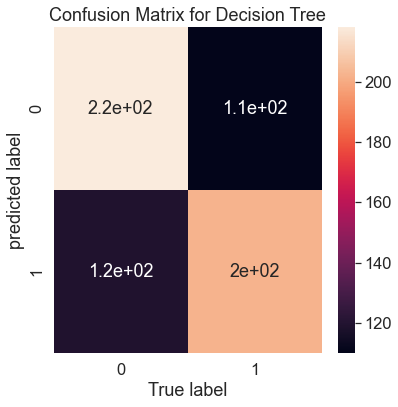

In [56]:
print('----------------------------------------------for Decision Tree--------------------------------------')
print(classification_report(y_test, dt.predict(test_x_vector)))
print(confusion_matrix(y_test,dt.predict(test_x_vector)))
plot_conf_mat(y_test,dt.predict(test_x_vector), 'Confusion Matrix for Decision Tree')

---------------------------------------------- for Naive Bayes ------------------------------------
              precision    recall  f1-score   support

         bad       0.58      0.51      0.54       328
        good       0.55      0.62      0.59       321

    accuracy                           0.57       649
   macro avg       0.57      0.57      0.56       649
weighted avg       0.57      0.57      0.56       649

[[168 160]
 [122 199]]


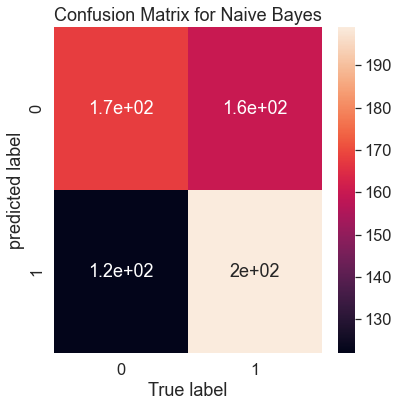

In [57]:
print('---------------------------------------------- for Naive Bayes ------------------------------------')
print(classification_report(y_test, gnb.predict(test_x_vector.toarray())))
print(confusion_matrix(y_test,gnb.predict(test_x_vector.toarray())))
plot_conf_mat(y_test,gnb.predict(test_x_vector.toarray()), 'Confusion Matrix for Naive Bayes')

------------------------------------ for Linear Regression ---------------------------------------
              precision    recall  f1-score   support

         bad       0.78      0.81      0.80       328
        good       0.80      0.77      0.79       321

    accuracy                           0.79       649
   macro avg       0.79      0.79      0.79       649
weighted avg       0.79      0.79      0.79       649

[[266  62]
 [ 73 248]]


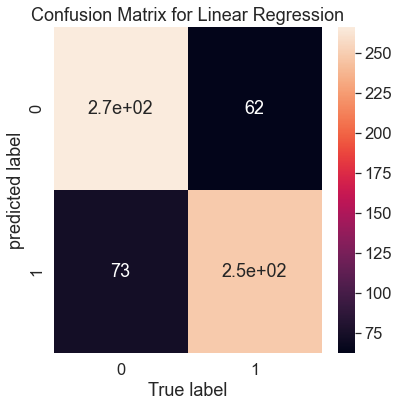

In [58]:
print('------------------------------------ for Linear Regression ---------------------------------------')
print(classification_report(y_test, lr.predict(test_x_vector)))
print(confusion_matrix(y_test,lr.predict(test_x_vector)))
plot_conf_mat(y_test,lr.predict(test_x_vector), 'Confusion Matrix for Linear Regression')

------------------------------------ for K nearest Neigbours ---------------------------------------
              precision    recall  f1-score   support

         bad       0.69      0.68      0.69       328
        good       0.68      0.69      0.69       321

    accuracy                           0.69       649
   macro avg       0.69      0.69      0.69       649
weighted avg       0.69      0.69      0.69       649

[[224 104]
 [ 99 222]]


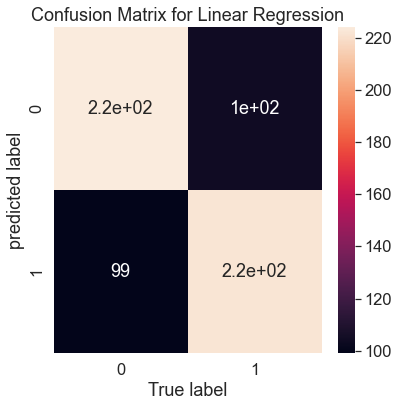

In [59]:
print('------------------------------------ for K nearest Neigbours ---------------------------------------')
print(classification_report(y_test, kn.predict(test_x_vector)))
print(confusion_matrix(y_test,kn.predict(test_x_vector)))
plot_conf_mat(y_test,kn.predict(test_x_vector), 'Confusion Matrix for Linear Regression')

------------------------------------ for Random forest ---------------------------------------
              precision    recall  f1-score   support

         bad       0.75      0.82      0.78       328
        good       0.80      0.71      0.75       321

    accuracy                           0.77       649
   macro avg       0.77      0.77      0.77       649
weighted avg       0.77      0.77      0.77       649

[[269  59]
 [ 92 229]]


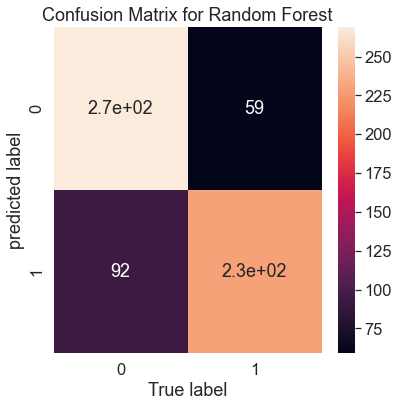

In [60]:
print('------------------------------------ for Random forest ---------------------------------------')
print(classification_report(y_test, rf.predict(test_x_vector)))
print(confusion_matrix(y_test,rf.predict(test_x_vector)))
plot_conf_mat(y_test,rf.predict(test_x_vector), 'Confusion Matrix for Random Forest')

**SVM, Linear Regression and Random forest perfrom well based on evaluaton.**

In [62]:
from sklearn.model_selection import GridSearchCV

parameter = {'kernel':('linear', 'rbf'),'C':(1,4,8,16,32)}
svc = svm.SVC()
isvm = GridSearchCV(svc, parameter, cv=5)

isvm.fit(train_x_vector, y_train)
isvm.score(test_x_vector, y_test)

0.8089368258859785

In [63]:

log_params ={
    "C":np.logspace(-4,4,30),
    "solver":['liblinear']
}

gs_log_reg = GridSearchCV(LogisticRegression(),log_params, cv= 5,
                         verbose=True)
gs_log_reg.fit(train_x_vector, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [64]:
log_grid = gs_log_reg.score(test_x_vector, y_test);

In [65]:
log_grid

0.7950693374422187

In [66]:
rf_grid ={
    "n_estimators":np.arange(10,1000,50),
    "max_depth":[None, 3,5,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)
    
}
rs_rf =GridSearchCV(RandomForestClassifier(),
                         rf_grid, cv=5, verbose=True)



In [67]:
rs_rf.fit(train_x_vector, y_train)

In [68]:
rs_rf_grid=rs_rf.score(test_x_vector, y_test)

### THE SVM MODEL PERFOMED VERY WELL 

##### Testing our models 

In [76]:
test_data = ['i hate this book it was awesom', 'cool book', 'stupid book', 'lovely insane book']

In [77]:
new_test = vectorizer.transform(test_data)
isvm.predict(new_test)

array(['bad', 'good', 'bad', 'good'], dtype=object)

##### Saving our model

In [78]:
import pickle

In [79]:
pickle.dump(svm_clf, open("sentiment_model_1.pk1", "wb"))

##### Loading model

In [80]:
loaded_model =pickle.load(open("sentiment_model_1.pk1", 'rb'))

In [81]:
loaded_data = ['good book', 'bad book', 'great book', 'book', 'not good for a book', 'very bad for a book']

In [82]:
loaded_data  = vectorizer.transform(loaded_data)
loaded_model.predict(loaded_data)

array(['good', 'bad', 'good', 'good', 'bad', 'bad'], dtype=object)